In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from PIL import Image

In [2]:
plt.style.use('classic')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['figure.figsize'] = [4, 4]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 12
plt.rc('lines', linewidth=2)
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.5
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True

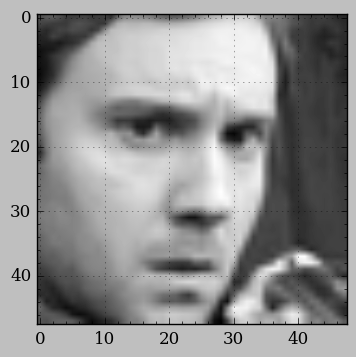

In [6]:
#load a picture from archive and display it
img = Image.open('archive/train/angry/im0.png')
plt.imshow(img, cmap='gray')

In [14]:
    #Use keras to create a dataset 
ds_train = keras.utils.image_dataset_from_directory(
    'archive/train',
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    batch_size=32,
    image_size=(48, 48),
    shuffle=True,
    seed=16,
    validation_split=0.2,
    subset='validation',
)


Found 28097 files belonging to 7 classes.
Using 5619 files for validation.


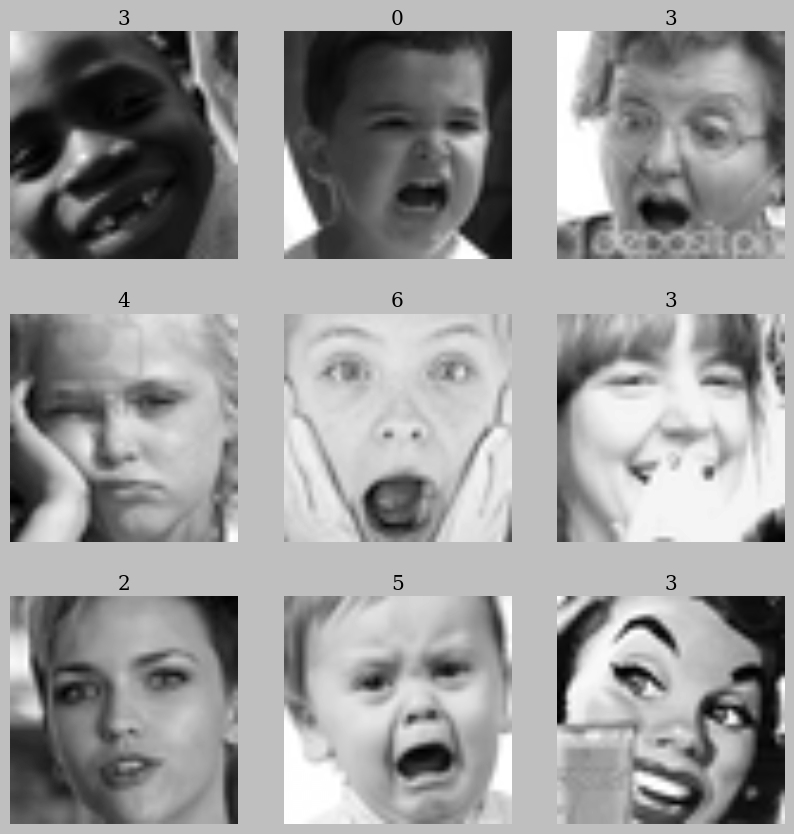

In [15]:
#Show a batch of images
plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8')[:, :, 0], cmap='gray')
        plt.title(int(tf.argmax(labels[i])))
        plt.axis('off')



In [16]:
#a test dataset
ds_test = keras.utils.image_dataset_from_directory(
    'archive/test',
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    batch_size=32,
    image_size=(48, 48),
    shuffle=True,
    seed=16,
)

Found 7178 files belonging to 7 classes.


In [17]:
#Create a model
model = keras.Sequential([
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(128, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(7, activation='softmax'),
])


In [18]:
#Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [19]:
#Train the model
model.fit(
    ds_train,
    validation_data=ds_test,
    epochs=10,
)


Epoch 1/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 29s 122ms/step - accuracy: 0.2244 - loss: 6.2563 - val_accuracy: 0.2750 - val_loss: 1.7537
Epoch 2/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 19s 109ms/step - accuracy: 0.3137 - loss: 1.6988 - val_accuracy: 0.3298 - val_loss: 1.6942
Epoch 3/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 18s 103ms/step - accuracy: 0.4011 - loss: 1.5643 - val_accuracy: 0.3991 - val_loss: 1.5656
Epoch 4/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 18s 101ms/step - accuracy: 0.4693 - loss: 1.4276 - val_accuracy: 0.3692 - val_loss: 1.6388
Epoch 5/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 19s 109ms/step - accuracy: 0.4940 - loss: 1.3393 - val_accuracy: 0.4093 - val_loss: 1.6690
Epoch 6/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 18s 103ms/step - accuracy: 0.5551 - loss: 1.1973 - val_accuracy: 0.4015 - val_loss: 1.8299
Epoch 7/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - accuracy: 0.6086 - loss: 1.0723 - val_accuracy: 0.4057 - val_loss: 1.8560
Epoch 8/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 16s 91ms/step - accuracy: 0.6563 - loss: 0.9

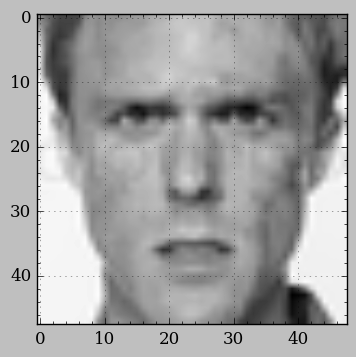

In [25]:
#Pick a random test picture and categorize it
img = Image.open('archive/test/angry/im102.png').resize((48, 48))
plt.imshow(img, cmap='gray')


In [26]:
img = np.array(img) / 255.0
img = np.expand_dims(img, axis=0)
img = np.expand_dims(img, axis=-1)
pred = model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 779ms/step


In [27]:
pred

array([[0.6601884 , 0.01545279, 0.03396709, 0.03324319, 0.06775368,
        0.07057522, 0.11881971]], dtype=float32)

conv2d (3, 3, 1, 32) (32,)


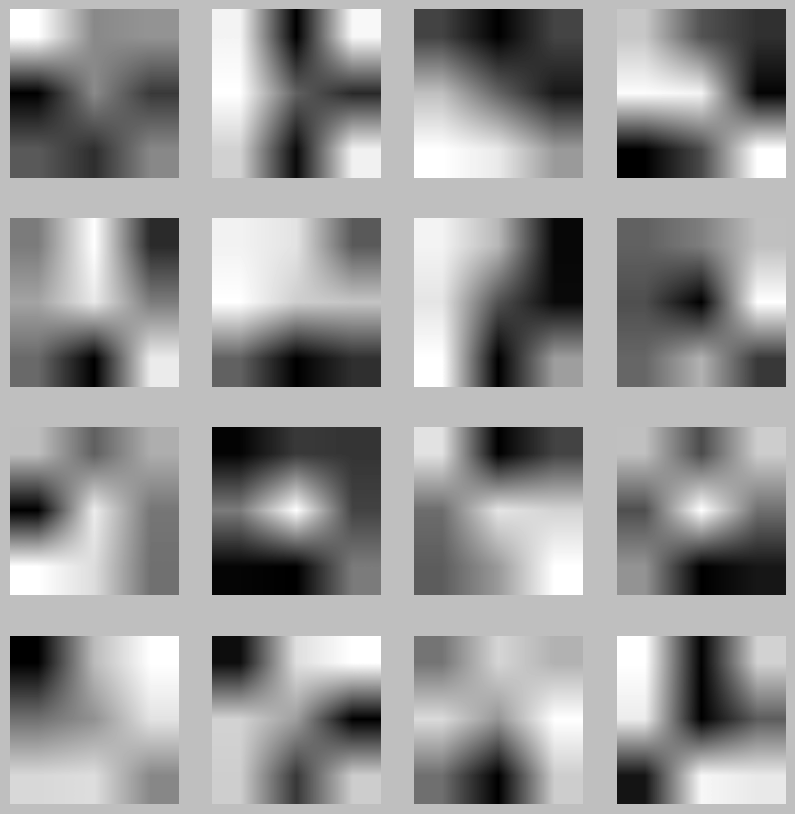

conv2d_1 (3, 3, 32, 64) (64,)


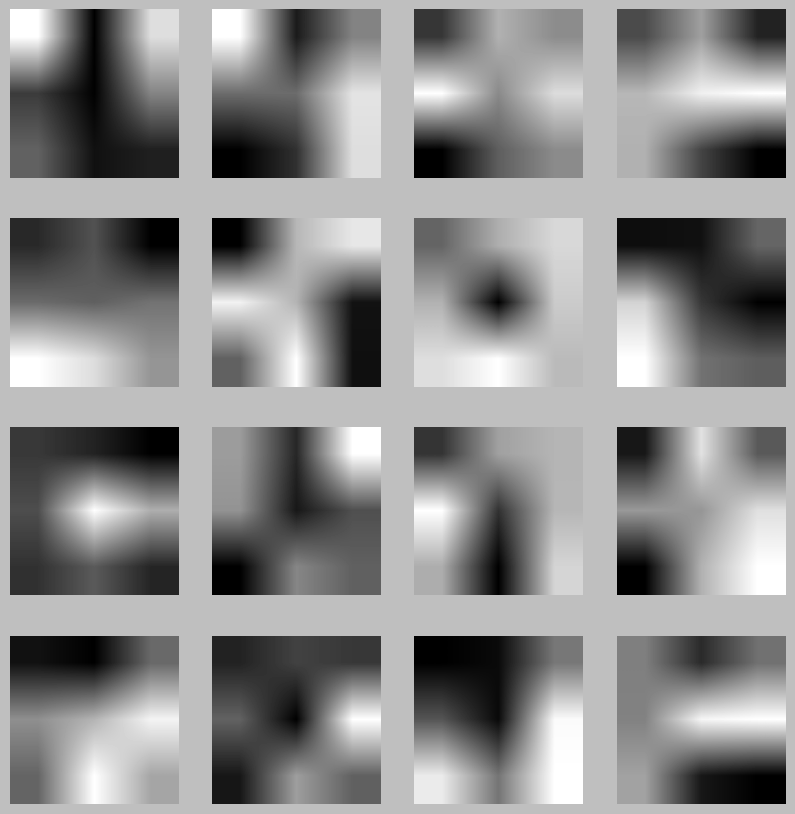

conv2d_2 (3, 3, 64, 128) (128,)


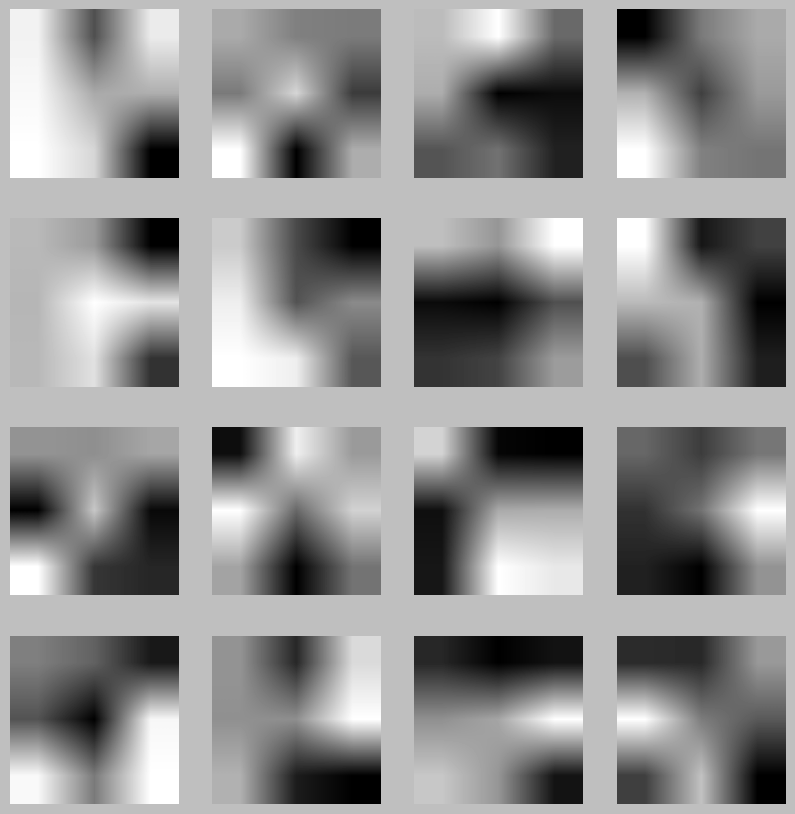

In [28]:
#Display the kernels used 
for layer in model.layers:
    if 'conv' in layer.name:
        weights, bias = layer.get_weights()
        print(layer.name, weights.shape, bias.shape)
        plt.figure(figsize=(10, 10))
        for i in range(16):
            ax = plt.subplot(4, 4, i + 1)
            plt.imshow(weights[:, :, 0, i], cmap='gray')
            plt.axis('off')
        plt.show()

In [33]:
#Save the model 
model.save('emotion_model_v1.keras')